In [0]:
from singlestep import *

from math import sqrt,exp
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics import mean_squared_error
from keras.layers import Dense,LSTM,Bidirectional,BatchNormalization,Dropout,Conv1D,GRU,MaxPooling1D
from keras.models import Sequential,Model
from keras.layers.merge import concatenate
from keras.callbacks import History, ModelCheckpoint
from keras import optimizers
from keras.engine.input_layer import Input
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler

In [0]:
def naya_split(data):  #CORRECT
    train,test=data[24*365*1+24*30*6:24*365*1+24*30*6+24*48],data[24*365*1+24*30*6+24*48:24*365*1+24*30*6+24*60]
    train=np.split(train,len(train)/24)
    test=np.split(test,len(test)/24)
    return np.array(train),np.array(test)

In [0]:
def findrmse(pred_val,true_val):
  score=0
  score=sqrt(mean_squared_error(true_val,pred_val))
  return score

In [0]:
def naveenforecast(hist,model,n_input):
  data=np.array(hist)
  ip=data[-n_input:,0:]
  ip1=ip[:,0].reshape(1,n_input,1)
  ip2=ip[:,1].reshape(1,n_input,1)
  ip3=ip[:,2].reshape(1,n_input,1)
  ip4=ip[:,3].reshape(1,n_input,1)
  ip5=ip[:,4].reshape(1,n_input,1)
  ip6=ip[:,5].reshape(1,n_input,1)
  ip7=ip[:,6].reshape(1,n_input,1)
  ip8=ip[:,7].reshape(1,n_input,1)
  ip9=ip[:,8].reshape(1,n_input,1)
  ip10=ip[:,9].reshape(1,n_input,1)
  ip11=ip[:,10].reshape(1,n_input,1)
  ip12=ip[:,11].reshape(1,n_input,1)
  ip13=ip[:,12].reshape(1,n_input,1)
  ip14=ip[:,13].reshape(1,n_input,1)
  ip15=ip[:,14].reshape(1,n_input,1)
  y_pred=model.predict([ip1,ip2,ip3,ip4,ip5,ip6,ip7,ip8,ip9,ip10,ip11,ip12,ip13,ip14,ip15])
  return y_pred[0]

In [0]:
def testmod(hist,test,n_input,model):
  new_test=test.reshape((test.shape[0]*test.shape[1],test.shape[2]))
  
  predictions=[]

  for i in range(len(new_test)):
    predictions.append(naveenforecast(hist,model,n_input))
    hist.append(new_test[i])

  return(predictions)

In [0]:
data=pd.read_csv('/content/Changpingpreproc.csv',header=0,parse_dates=True,index_col=['No'])
min=data['PM2.5'].min()
max=data['PM2.5'].max()

scalar=MinMaxScaler(feature_range=(0,1))
data=scalar.fit_transform(data)

n_input=4
train,test=naya_split(data)

print(train.shape)
print(test.shape)

train_x,train_y=to_supervised(train,n_input,1)
print(train_x.shape)
print(train_y.shape)

(48, 24, 15)
(12, 24, 15)
(1148, 4, 15)
(1148, 1)


In [0]:
weightage=[]
for i in range(10):
  weightage.append(1/10)

print(weightage)
print(weightage[0])
#initializing weightage value

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
0.1


In [0]:
#loading model associated with each of the city

models=[]

models.insert(0,pickle.load(open('/content/ftAotizhongxin.sav','rb')))
models.insert(1,pickle.load(open('/content/ftDongsi.sav','rb')))
models.insert(2,pickle.load(open('/content/ftGuanyuan.sav','rb')))
models.insert(3,pickle.load(open('/content/ftGucheng.sav','rb')))
models.insert(4,pickle.load(open('/content/ftHuairou.sav','rb')))
models.insert(5,pickle.load(open('/content/ftNongzhanguan.sav','rb')))
models.insert(6,pickle.load(open('/content/ftShunyi.sav','rb')))
models.insert(7,pickle.load(open('/content/ftTiantan.sav','rb')))
models.insert(8,pickle.load(open('/content/ftWanliu.sav','rb')))
models.insert(9,pickle.load(open('/content/ftWanshouxigong.sav','rb')))



print(models[0].summary())
print(len(models))

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 4, 1)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 4, 1)         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 4, 1)         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 4, 1)         0                                            
____________________________________________________________________________________________

In [0]:
#For each training sample, we are making a prediction using
#every model and then we are taking squared-error using the real and predicted values
#using the same loss, weightage value associated with each model is updated

for i in range(len(train_x)):

  ip=train_x[i]
  ip1=ip[:,0].reshape(1,n_input,1)
  ip2=ip[:,1].reshape(1,n_input,1)
  ip3=ip[:,2].reshape(1,n_input,1)
  ip4=ip[:,3].reshape(1,n_input,1)
  ip5=ip[:,4].reshape(1,n_input,1)
  ip6=ip[:,5].reshape(1,n_input,1)
  ip7=ip[:,6].reshape(1,n_input,1)
  ip8=ip[:,7].reshape(1,n_input,1)
  ip9=ip[:,8].reshape(1,n_input,1)
  ip10=ip[:,9].reshape(1,n_input,1)
  ip11=ip[:,10].reshape(1,n_input,1)
  ip12=ip[:,11].reshape(1,n_input,1)
  ip13=ip[:,12].reshape(1,n_input,1)
  ip14=ip[:,13].reshape(1,n_input,1)
  ip15=ip[:,14].reshape(1,n_input,1)

  predicted=[]
  for j in range(10):
    p=models[j].predict([ip1,ip2,ip3,ip4,ip5,ip6,ip7,ip8,ip9,ip10,ip11,ip12,ip13,ip14,ip15])
    p=p[0][0]
    predicted.append(p)

  actual=train_y[i][0]
  loss=[]
  for j in range(10):
    loss.append((actual-predicted[j])**2)

  n=10
  sum=0
  for j in range(10):
    weightage[j]=weightage[j]*exp(-n*loss[j]) 
    sum=sum+weightage[j]

  for j in range(10):
    weightage[j]=weightage[j]/sum


print(weightage)   

[0.13363059614049583, 0.10715660297349082, 0.041070205572694335, 0.08574207800500817, 0.14254978725674125, 0.09572843069665196, 0.0893133455699037, 0.11083609849580645, 0.14003159416727948, 0.05394126112192798]


In [0]:
hist=[]
for i in range(n_input):
  hist.append(train_x[len(train_x)-1][i])

In [0]:
# for testing purpose, n predictions are multiplied with their
# respective model-weightage value
# average of the predicted value is then taken

predictions=[]
length=0
for i in range(10):
  pred=testmod(hist,test,n_input,models[i])
  length=len(pred)
  for j in range(len(pred)):
    pred[j]=pred[j]*weightage[i]

  predictions.append(pred)

final_predictions=[]
for i in range(length):
  final_predictions.append(0)

for i in range(length):
  for j in range(10):
    final_predictions[i]=final_predictions[i]+predictions[j][i]



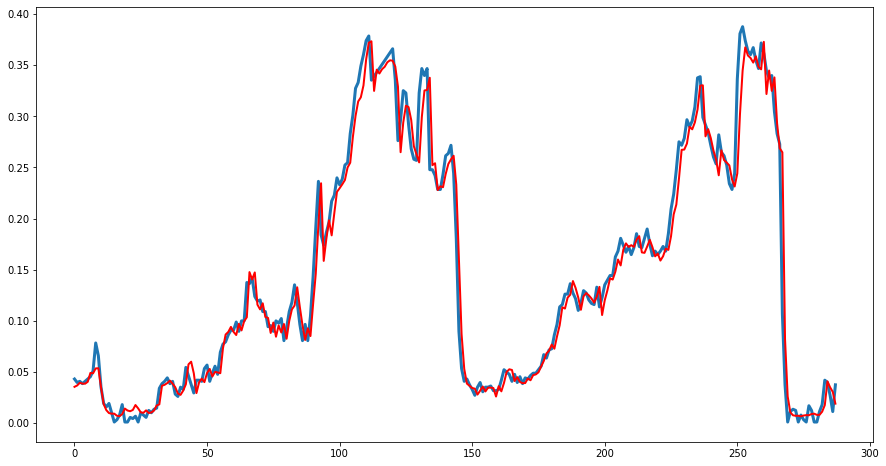

In [0]:
#modify
new_test=test.reshape((test.shape[0]*test.shape[1],test.shape[2]))
pyplot.figure(figsize=(15,8)) 
pyplot.plot(new_test[:,0],linewidth=3)
pyplot.plot(final_predictions,linewidth=2,color='red')

In [0]:
#modify
rmse=findrmse(final_predictions,new_test[:,0])
print(rmse*(max-min)+min)

20.11529242633728
